## Show some operations when combining multiple images together

In [2]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display

In [37]:
def get_contour(im):
    contours, hierarchy = cv2.findContours(im.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    out = np.zeros_like(im)
    # On this output, draw all of the contours that we have detected
    # in white, and set the thickness to be 3 pixels
    # cv2.drawContours(out, contours, -1, 255, 3)

    out = cv2.fillPoly(out, contours, 255)

    return out

In [55]:
def get_masked_region(mask_img):
    gray = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)

    contour = get_contour(thresh)
    return contour


uint8 (512, 512, 3)


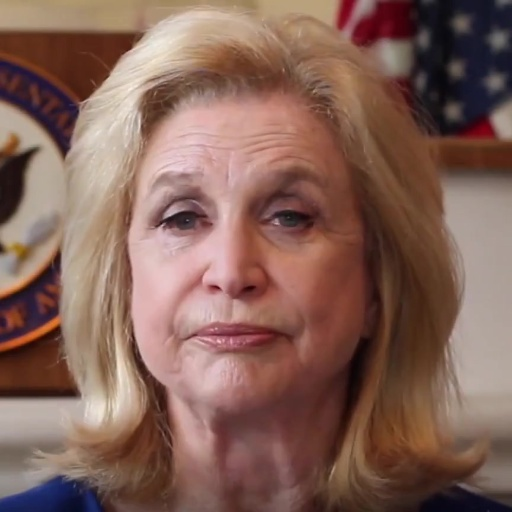

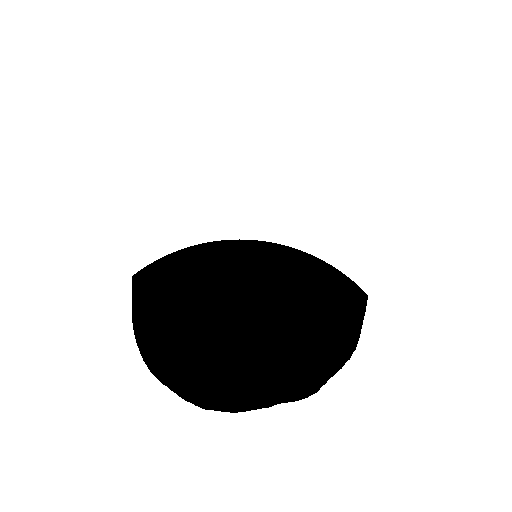

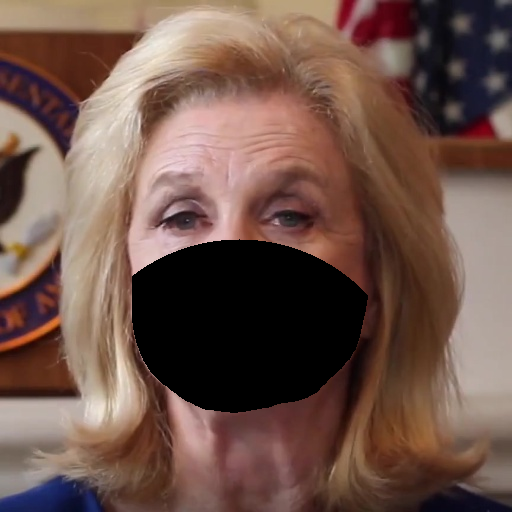

In [3]:
# contour = get_masked_region(mask_img)
# contour = cv2.imread("/home/haimingzhang/Research/Programming/cv-fighter/HDTF_Dataset/HDTF_preprocessed/RD_Radio1_000/mouth_mask/000000.png", cv2.IMREAD_UNCHANGED)
# print(contour.dtype, contour.shape)

src_img_path = "/mnt/inspurfs/user-fs/221019051/Programming/cv-fighter/data_fighter/HDTF_preprocessor/HDTF_preprocessed/WDA_CarolynMaloney1_000/face_image/000000.jpg"
msk_img_path = "/mnt/inspurfs/user-fs/221019051/Programming/cv-fighter/data_fighter/HDTF_preprocessor/HDTF_preprocessed/WDA_CarolynMaloney1_000/lower_mask/000000.png"

src_img = cv2.imread(src_img_path, cv2.IMREAD_UNCHANGED)
msk_img = cv2.imread(msk_img_path, cv2.IMREAD_UNCHANGED)[..., :1]

print(src_img.dtype, src_img.shape)
display(Image.fromarray(src_img[..., ::-1]))

mask2 = cv2.bitwise_not(msk_img)
display(Image.fromarray(mask2))

masked_img = cv2.bitwise_and(src_img, src_img, mask=mask2)
display(Image.fromarray(masked_img[..., ::-1]))

mask_image:  (512, 512) uint8


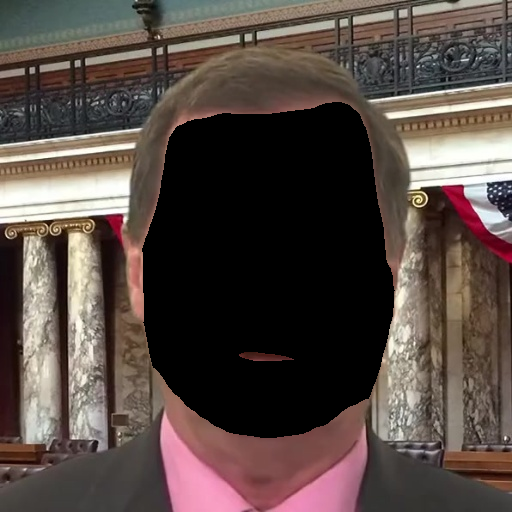

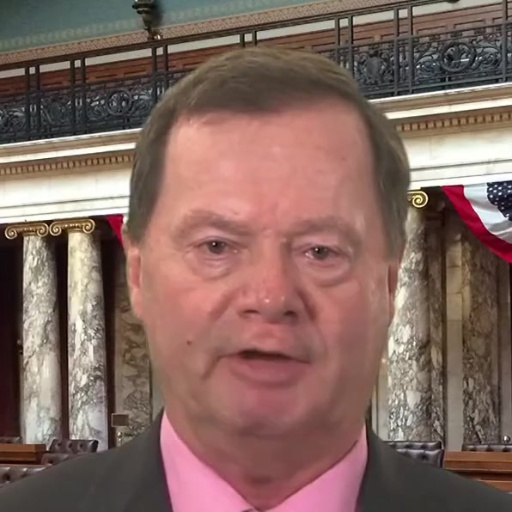

In [12]:
def get_masked_image(src_img, mask_img):
    src_img = src_img / 255.0
    mask_img = mask_img / 255.0

    output_img = src_img * (1 - mask_img[..., None])
    output_img = (output_img * 255.0).astype(np.uint8)
    return output_img

src_img_path = "./data/000000.jpg"
mask_img_path = "./data/000000mask.png"

src_img_path = "/home/zhanghm/Research/StyleGAN/Deep3DFaceRecon_pytorch/datasets/HDTF_preprocessed/RD_Radio40_000/face_image/000000.jpg"
mask_img_path = "/home/zhanghm/Research/StyleGAN/Deep3DFaceRecon_pytorch/datasets/HDTF_preprocessed/RD_Radio40_000/face_image/mask_refine/000000.png"

src_img = cv2.imread(src_img_path)
mask_img = cv2.imread(mask_img_path, cv2.IMREAD_UNCHANGED)[..., 0]
print("mask_image: ", mask_img.shape, mask_img.dtype)

masked_img = get_masked_image(src_img, mask_img)

display(Image.fromarray(masked_img[..., ::-1]))
display(Image.fromarray(src_img[..., ::-1]))

## Paste mask onto image

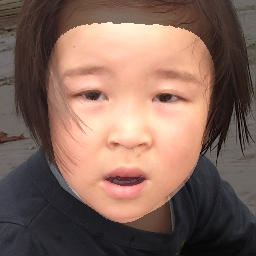

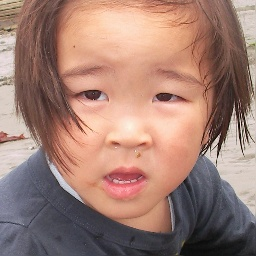

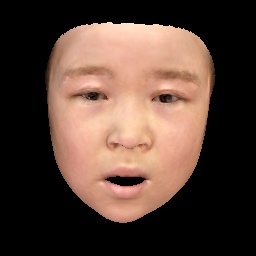

In [10]:
def paste_mask(src_img, mask_img, mask=None):
    if mask is None:
        mask = np.expand_dims(cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY) > 0, -1)
    else:
        mask = mask[..., None]
    # mask = cv2.threshold(gray,220,220, cv2.THRESH_BINARY)[1]
    output_image =  mask_img * mask + src_img * (1 - mask)
    output_image = output_image.astype(np.uint8)
    return output_image

src_img = "/home/zhanghm/Research/Github/Deep3DFaceReconstruction-Pytorch/work_dir/68027_src.jpg"
mask_img = "/home/zhanghm/Research/Github/Deep3DFaceReconstruction-Pytorch/work_dir/68027_recon.jpg"
# mask_img = "/home/haimingzhang/Research/Programming/cv-fighter/face_fighter/3DMM/output2/000000.jpg"

src_img = cv2.imread(src_img)
mask_img = cv2.imread(mask_img, cv2.IMREAD_UNCHANGED)

add_weighted_img = cv2.addWeighted(src_img, 0.5, mask_img, 0.6, 0)
display(Image.fromarray(add_weighted_img[..., ::-1]))

display(Image.fromarray(src_img[..., ::-1]))

display(Image.fromarray(mask_img[..., ::-1]))



# output_img = paste_mask(src_img, mask_img)
# display(Image.fromarray(output_img[..., ::-1]))

# output_img = swap_masked_region(src_img, mask_img, contour)

# # output_img = paste_mask(src_img, mask_img, mask=contour)
# display(Image.fromarray(output_img[..., ::-1]))

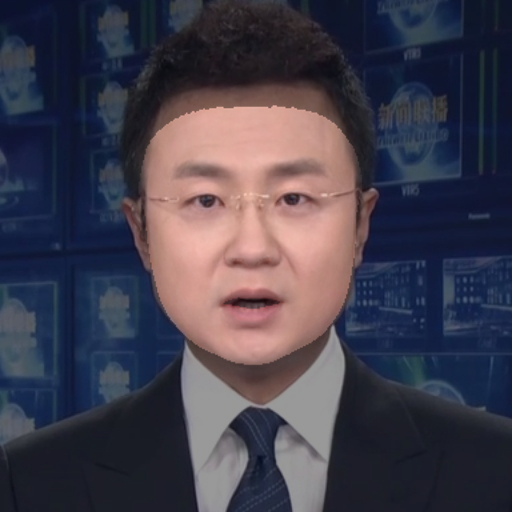

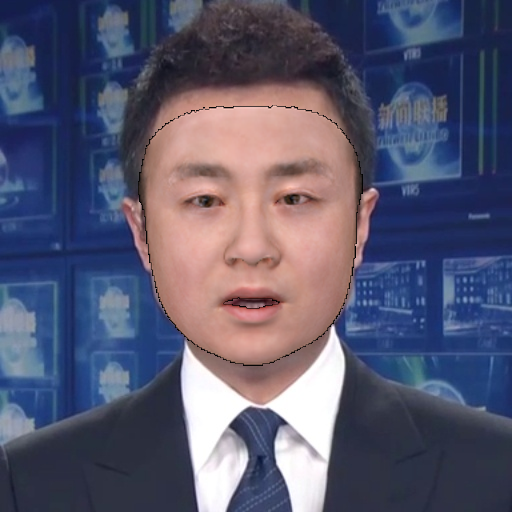

In [3]:
image_1_path = "/home/haimingzhang/Research/Programming/cv-fighter/facial_preprocessed/video_preprocessed/id00001/gangqiang_5/deep3dface_512/000400.png"
image_2_path = "/home/haimingzhang/Research/Programming/cv-fighter/facial_preprocessed/video_preprocessed/id00001/gangqiang_5/face_image/000400.jpg"

image_1 = cv2.imread(image_1_path)
image_2 = cv2.imread(image_2_path)

add_weighted_img = cv2.addWeighted(image_2, 0.6, image_1, 0.4, 0)
display(Image.fromarray(add_weighted_img[..., ::-1]))

mask = np.expand_dims(cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY) > 0, -1)

output_image =  image_1 * mask + image_2 * (1 - mask)
output_image = output_image.astype(np.uint8)

display(Image.fromarray(output_image[..., ::-1]))

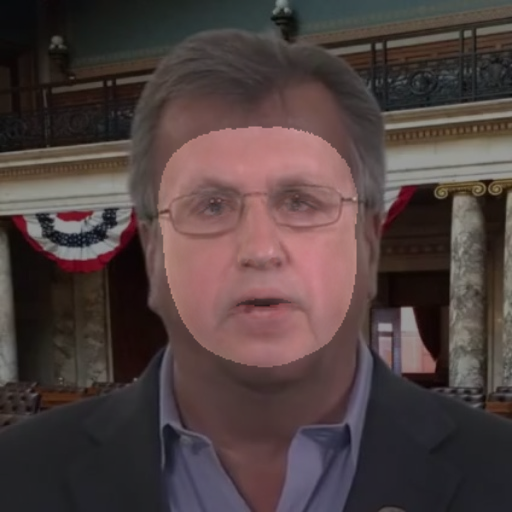

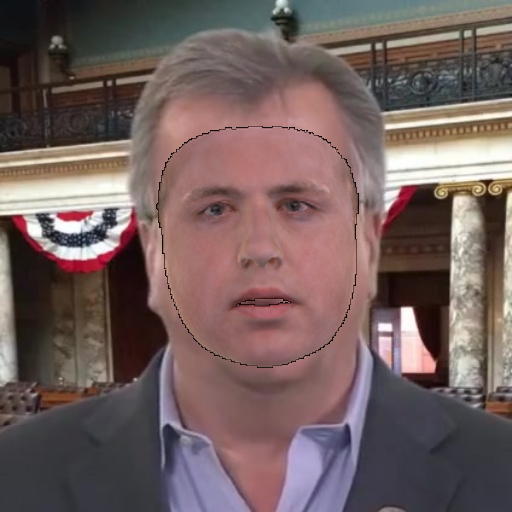

In [5]:
image_1_path = "/home/haimingzhang/Research/Programming/cv-fighter/facial_preprocessed/debug/000010.png"
image_2_path = "/home/haimingzhang/Research/Programming/cv-fighter/HDTF_Dataset/HDTF_preprocessed/RD_Radio9_000/face_image/000010.jpg"

image_1 = cv2.imread(image_1_path)
image_2 = cv2.imread(image_2_path)

add_weighted_img = cv2.addWeighted(image_2, 0.6, image_1, 0.4, 0)
display(Image.fromarray(add_weighted_img[..., ::-1]))

mask = np.expand_dims(cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY) > 0, -1)

output_image =  image_1 * mask + image_2 * (1 - mask)
output_image = output_image.astype(np.uint8)

display(Image.fromarray(output_image[..., ::-1]))

In [ ]:
mask_img = "/home/haimingzhang/Research/Programming/cv-fighter/facial_preprocessed/video_preprocessed/id00001/gangqiang_5/deep3dface_512/000078.png"
mask_img = cv2.imread(mask_img)

mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
display(Image.fromarray(mask_img))

mask_img[mask_img > 0] = 255

print(mask_img.dtype)

# cv2.imwrite("3dmm_mask.jpg", mask_img)

def get_contour(im):
    contours, hierarchy = cv2.findContours(im.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    print(type(contours), len(contours))

    out = np.zeros_like(im)
    # On this output, draw all of the contours that we have detected
    # in white, and set the thickness to be 3 pixels
    # cv2.drawContours(out, contours, -1, 255, 3)

    cv2.fillPoly(out, contours, 255)

    display(Image.fromarray(out))

get_contour(mask_img)


### Seamless Clone

In [ ]:
def swap_masked_region(target_img, src_img, mask):
    """From src_img crop masked region to replace corresponding masked region
       in target_img
    """
    mask_img = cv2.GaussianBlur(mask, (21,21), 11)
    # input1_mask = cv2.bitwise_and(target_img, target_img, mask=cv2.bitwise_not(mask_img))
    # input2_mask = cv2.bitwise_and(src_img, src_img, mask=mask)

    # img = cv2.addWeighted(input1_mask, 1, input2_mask, 1, 0)
    mask1 = mask_img / 255
    mask1 = np.tile(np.expand_dims(mask1, axis=2), (1,1,3))
    # print(f"mask1 time is {time.time()-start}")
    img = src_img * mask1 + target_img * (1 - mask1)
    # foreground = cv2.multiply(src_img.astype(np.float), mask1)
    # background = cv2.multiply(1.0 - mask1, target_img.astype(np.float))
    # img = cv2.add(foreground, background)
    return img.astype(np.uint8)

In [ ]:
src_img = "/home/haimingzhang/Research/Face/FACIAL/examples/test_image/gangqiang5/000078.jpg"
dst_img = "/home/haimingzhang/Research/Programming/cv-fighter/facial_preprocessed/video_preprocessed/id00001/gangqiang_5/face_image/000078.jpg"
mask_img = "/home/haimingzhang/Research/Programming/cv-fighter/facial_preprocessed/video_preprocessed/id00001/gangqiang_5/deep3dface_512/000078.png"

src_img = cv2.imread(src_img)
dst_img = cv2.imread(dst_img)
mask_img = cv2.imread(mask_img)

origin_mask_img = mask_img.copy()

mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
mask_img[mask_img > 0] = 255

kernel = np.ones((21, 21), np.uint8)  
erosion = cv2.erode(mask_img, kernel, iterations = 1)

# mask_img = mask_img.astype(np.uint8)

# mask_img = np.ones(src_img.shape, src_img.dtype) * 255

display(Image.fromarray(src_img[..., ::-1]))

display(Image.fromarray(dst_img[..., ::-1]))

display(Image.fromarray(mask_img))
display(Image.fromarray(erosion))


output = swap_masked_region(dst_img, origin_mask_img, erosion)
# output = cv2.seamlessClone(src_img, dst_img, mask_img, (256, 256), cv2.NORMAL_CLONE)
display(Image.fromarray(output[..., ::-1]))